In [94]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df1 = pd.read_csv('../data/trust_robot.csv')
df2 = pd.read_csv('../data/trust_robot.csv')

df = pd.concat([df1, df2], axis=0)

In [4]:
df.shape

(2472, 7)

In [9]:
df = df.drop_duplicates(['title'], keep='first')

In [16]:
def remove_dup(df1_path, df2_path, dst_path, dst_name, column='title'):
    '''
    Concate two csv files and remove duplicate in the concatenated csv file.
    Then, store the result in csv format.

    Input:
        df1_path: path of the first csv file 
        df2_path: path of the second csv file 
        dst_path: destination path for saving the concatednated csv file
        dst_name: name for saving the concatednated csv file
        column: column to compare the duplicates
    Output:
        result_df: the result dataframe
    '''
    df1 = pd.read_csv(df1_path)
    df2 = pd.read_csv(df2_path)
    df = pd.concat([df1, df2], axis=0)
    result_df = df.drop_duplicates([column], keep='first')
    result_df.to_csv(dst_path + dst_name)

    return result_df

def extract_text(df):
    '''
    extract text(abstract) in data

    Input:
        data_path: path of csv file to extract texts
    Output:
        None
    '''
    texts = df['abstract'].to_list()
    return texts


In [ ]:
def data_info(df, dir):
    '''
    전체 데이터의 개수와 데이터를 연도별로 분류하여 각 연도별 데이터의 개수를 dictionary로 리턴
    또한, 연도별 논문의 수를 csv로 변환 및 막대 그래프로 나타낸 후 dir folder에 저장 (x축: 연도, y축: 연도별 데이터 개수)
    
    input
      data: 전체 데이터

    output
      total_num: 전체 데이터 개수
      data_year: 연도를 key로 가지며 해당 년도의 데이터를 value로 가짐
    '''
    csv_name = "/DataYearCount.csv"
    fig_name = "/DataYearCount.png"
    csv_path = dir + csv_name; fig_path = dir + fig_name

    return total_num, data_year


In [17]:
df = pd.read_csv('../data/trust_robot.csv')

In [22]:
df['date']

0         2021 May 6
1           2018 Dec
2       2018 May-Jun
3           2021 Mar
4           2020 Dec
            ...     
1231        2022 May
1232        2018 Mar
1233        2022 Sep
1234        2019 May
1235     2015 Jun 25
Name: date, Length: 1236, dtype: object

In [141]:
def info(df):
    years = []
    for i in range(len(df['date'])):
        if type(df.loc[i, 'date']) == str:
            years.append(df.loc[i, 'date'].split()[0])
        elif math.isnan(df.loc[i, 'date']):
            years.append('None')
        else:
            print(i, df.loc[i, 'date'])
            
    df['year'] = years
    years_count = df['year'].value_counts().sort_index()
    

<AxesSubplot:>

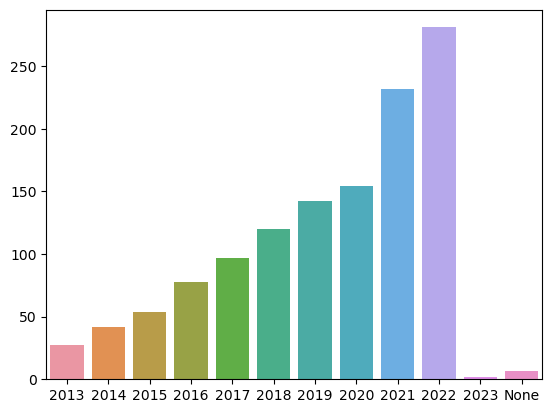

In [147]:
df = pd.read_csv('../data/trust_robot.csv')
years = []
for i in range(len(df['date'])):
    if type(df.loc[i, 'date']) == str:
        years.append(df.loc[i, 'date'].split()[0])
    elif math.isnan(df.loc[i, 'date']):
        years.append('None')
    else:
        print(i, df.loc[i, 'date'])

df['year'] = years
years_count = df['year'].value_counts().sort_index()

sns_plot = sns.barplot(x=years_count.index, y=years_count.values)

In [127]:
type(years)

pandas.core.series.Series

In [117]:
years_index = years.index
years_values = years.values

In [118]:
years_index

Index(['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2023', 'None'],
      dtype='object')

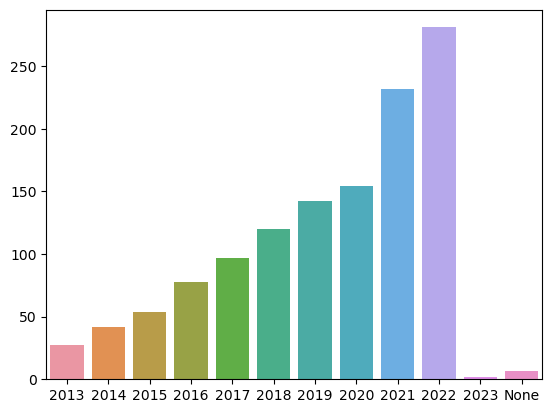

In [103]:
sns_plot = sns.barplot(x=years_index, y=years_values)
fig = sns_plot.get_figure()

In [104]:
fig.savefig('test.png')

In [128]:
years

2013     27
2014     42
2015     54
2016     78
2017     97
2018    120
2019    142
2020    154
2021    232
2022    281
2023      2
None      7
Name: year, dtype: int64

In [136]:
years.to_csv('years.csv', header=False)

In [139]:
df = pd.read_csv('years.csv')

In [140]:

df

,2013,27
0,2014,42
1,2015,54
2,2016,78
3,2017,97
4,2018,120
5,2019,142
6,2020,154
7,2021,232
8,2022,281
9,2023,2


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

/Users/shimgahyeon/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [15]:
def tokenizer(text):
    '''
    apply tokenizer
    '''
    cachedStopWords = stopwords.words("english")
    RegTok = RegexpTokenizer("[\w']{3,}")
    english_stops = set(stopwords.words('english'))
    tokens = RegTok.tokenize(text.lower())
    # stopwords 제외
    words = [word for word in tokens if (word not in english_stops) and len(word) > 2]
    
    stemmer = PorterStemmer()
    word_token = [stemmer.stem(i) for i in words]
    
    return words, word_token

<>:6: DeprecationWarning: invalid escape sequence \w
<>:6: DeprecationWarning: invalid escape sequence \w
/var/folders/f8/6p0t23zx0p9c90vcc29hyy1h0000gn/T/ipykernel_78934/810353690.py:6: DeprecationWarning: invalid escape sequence \w
  RegTok = RegexpTokenizer("[\w']{3,}")


In [17]:
papers = ['He has refused his Assent to Laws, the most wholesome and necessary for the public good.',
        'He has refused his Assent to Laws, the most wholesome and necessary for the public good.']

texts = []
orig_words = []
for paper in papers:
    words, word_token = tokenizer(paper)
    orig_words.append(words)
    texts.append(word_token)

In [18]:
texts

[['refus', 'assent', 'law', 'wholesom', 'necessari', 'public', 'good'],
 ['refus', 'assent', 'law', 'wholesom', 'necessari', 'public', 'good']]

In [25]:
import itertools
texts2 = list(itertools.chain(*texts))
orig_words2 = list(itertools.chain(*orig_words))

In [24]:
texts2

['refus',
 'assent',
 'law',
 'wholesom',
 'necessari',
 'public',
 'good',
 'refus',
 'assent',
 'law',
 'wholesom',
 'necessari',
 'public',
 'good']

In [19]:
orig_words

[['refused', 'assent', 'laws', 'wholesome', 'necessary', 'public', 'good'],
 ['refused', 'assent', 'laws', 'wholesome', 'necessary', 'public', 'good']]

In [8]:
words.append('refusing')

In [9]:
word_token.append('refus')

In [35]:
df = pd.DataFrame()
df['afterStem'] = texts2
df['beforeStem'] = orig_words2
df = df.drop_duplicates(['afterStem'])
df = df.sort_values(by='afterStem', axis=0)

In [34]:
df

,afterStem,beforeStem
0,refus,refused
1,assent,assent
2,law,laws
3,wholesom,wholesome
4,necessari,necessary
5,public,public
6,good,good


In [ ]:
df.duplicated(['beforeStem'], keep='first')